In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from wordcloud import WordCloud

In [ ]:
# Load dataset
data = pd.read_csv('KoreanDramasDatasets.csv')

In [ ]:
# Melihat 5 data teratas yang ada di dataset
data.head()

,Rank,Title,Year of release,Number of Episodes,Rating,Description,Genre,Tags,Actors
0,#1,Move to Heaven,2021,10,9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...","Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju..."
1,#2,Twinkling Watermelon,2023,16,9.2,"In 2023, high school student Eun Gyeol, a CODA...","Romance, Youth, Drama, Fantasy","Time Travel, Child From The Future, Sign Langu...","Ha Eun-Gyeol, Ha Yi-Chan, Choi Se-Kyung, Yoon ..."
2,#3,Moving,2023,20,9.1,"Kim Bong Seok, Jang Hui Su, and Lee Gang Hun, ...","Action, Thriller, Mystery, Supernatural","Graphic Violence, Supernatural Power, Multiple...","Ryu Seung Ryong, Han Hyo Joo, Zo In Sung"
3,#4,The Trauma Code: Heroes on Call,2025,8,9.1,"Baek Gang Hyeok, a genius trauma surgeon with ...","Action, Comedy, Drama, Medical","Surgeon Male Lead, Hospital Setting, Mentor-Me...","Ju Ji Hoon, Choo Young Woo, Ha Young, Yoon Gyu..."
4,#5,Flower of Evil,2020,16,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ..."


In [ ]:
# Melihat tipe data dari setiap kolom yang ada di dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                350 non-null    object 
 1   Title               350 non-null    object 
 2   Year of release     350 non-null    int64  
 3   Number of Episodes  350 non-null    int64  
 4   Rating              350 non-null    float64
 5   Description         350 non-null    object 
 6   Genre               350 non-null    object 
 7   Tags                350 non-null    object 
 8   Actors              350 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 24.7+ KB


In [ ]:
# Cek apakah ada data yang hilang pada dataset
data.isnull().sum()

Rank                  0
Title                 0
Year of release       0
Number of Episodes    0
Rating                0
Description           0
Genre                 0
Tags                  0
Actors                0
dtype: int64

Setelah di cek dataset tidak memiliki data yang hilang dan semuanya terisi, kalau begitu kita dapat lanjut untuk analisis.

In [ ]:
# Cek deskripsi statistik dari dataset
data.describe()

,Year of release,Number of Episodes,Rating
count,350.000000,350.000000,350.000000
mean,2019.808571,18.254286,8.364857
std,3.713282,14.565962,0.454704
min,2003.000000,1.000000,6.400000
25%,2018.000000,12.000000,8.300000
50%,2020.000000,16.000000,8.400000
75%,2023.000000,16.000000,8.600000
max,2025.000000,133.000000,9.200000


Dataset yang dikumpulkan berdasarkan sumber website mydramalist yang memuat 350 data Drama Korea. Dari tabel yang ada diatas didapatkan bahwa :
1. Drama Korea memiliki rata-rata rating 8.36 dari 10.
2. Drama Korea memiliki rata-rata jumlah episode, yaitu 8 episode.
3. Drama Korea yang ada di dalam dataset rata-rata diproduksi pada tahun 2023.

In [ ]:
# Cek berapa jumlah drama setiap tahunnya
data['Year of release'].value_counts()

2024    44
2023    42
2021    39
2019    37
2020    35
2022    33
2017    27
2018    24
2016    13
2025    13
2013    11
2015     9
2014     7
2012     7
2011     4
2003     1
2009     1
2010     1
2006     1
2007     1
Name: Year of release, dtype: int64

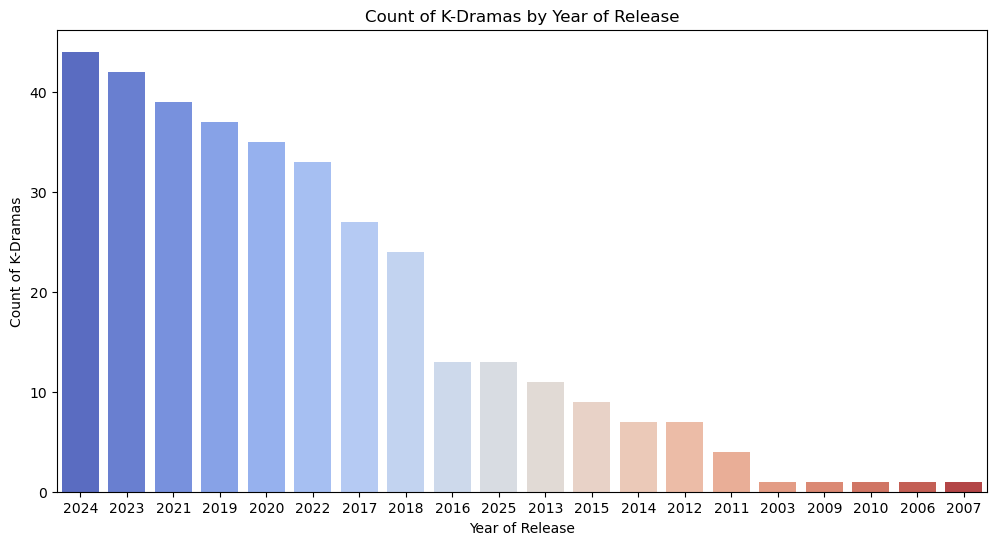

In [14]:
# Visualizing with plot
plt.figure(figsize=(12,6))
plt.title('Count of K-Dramas by Year of Release')
sns.countplot(data=data, x="Year of release", order=data["Year of release"].value_counts().index, palette="coolwarm")
plt.xlabel("Year of Release")
plt.ylabel("Count of K-Dramas")
plt.show()

From this plot we know that every year korean dramas are increase very significant. The gap between 2016 and 2017 is very high. Korean dramas has giant increase at 2016 to 2017.

In [15]:
# check the most frequent genres
# 1. Pecah Genre berdasarkan ", " lalu explode
allGenres = data["Genre"].str.split(", ").explode()

# 2. Standardisasi penulisan: hapus spasi ekstra + huruf kecil semua (opsional)
allGenres = allGenres.str.strip().str.title()

# 3. Hitung jumlah masing-masing genre
genreCounts = Counter(allGenres)

# 4. Masukkan ke DataFrame
genre_df = pd.DataFrame(genreCounts.items(), columns=["Genre", "Count"])

# 5. Urutkan berdasarkan jumlah, kalau mau
genre_df = genre_df.sort_values(by="Count", ascending=False)

genre_df


,Genre,Count
1,Drama,190
3,Romance,186
10,Comedy,127
8,Mystery,126
7,Thriller,122
6,Action,62
13,Melodrama,58
0,Life,55
5,Fantasy,48
17,Historical,45


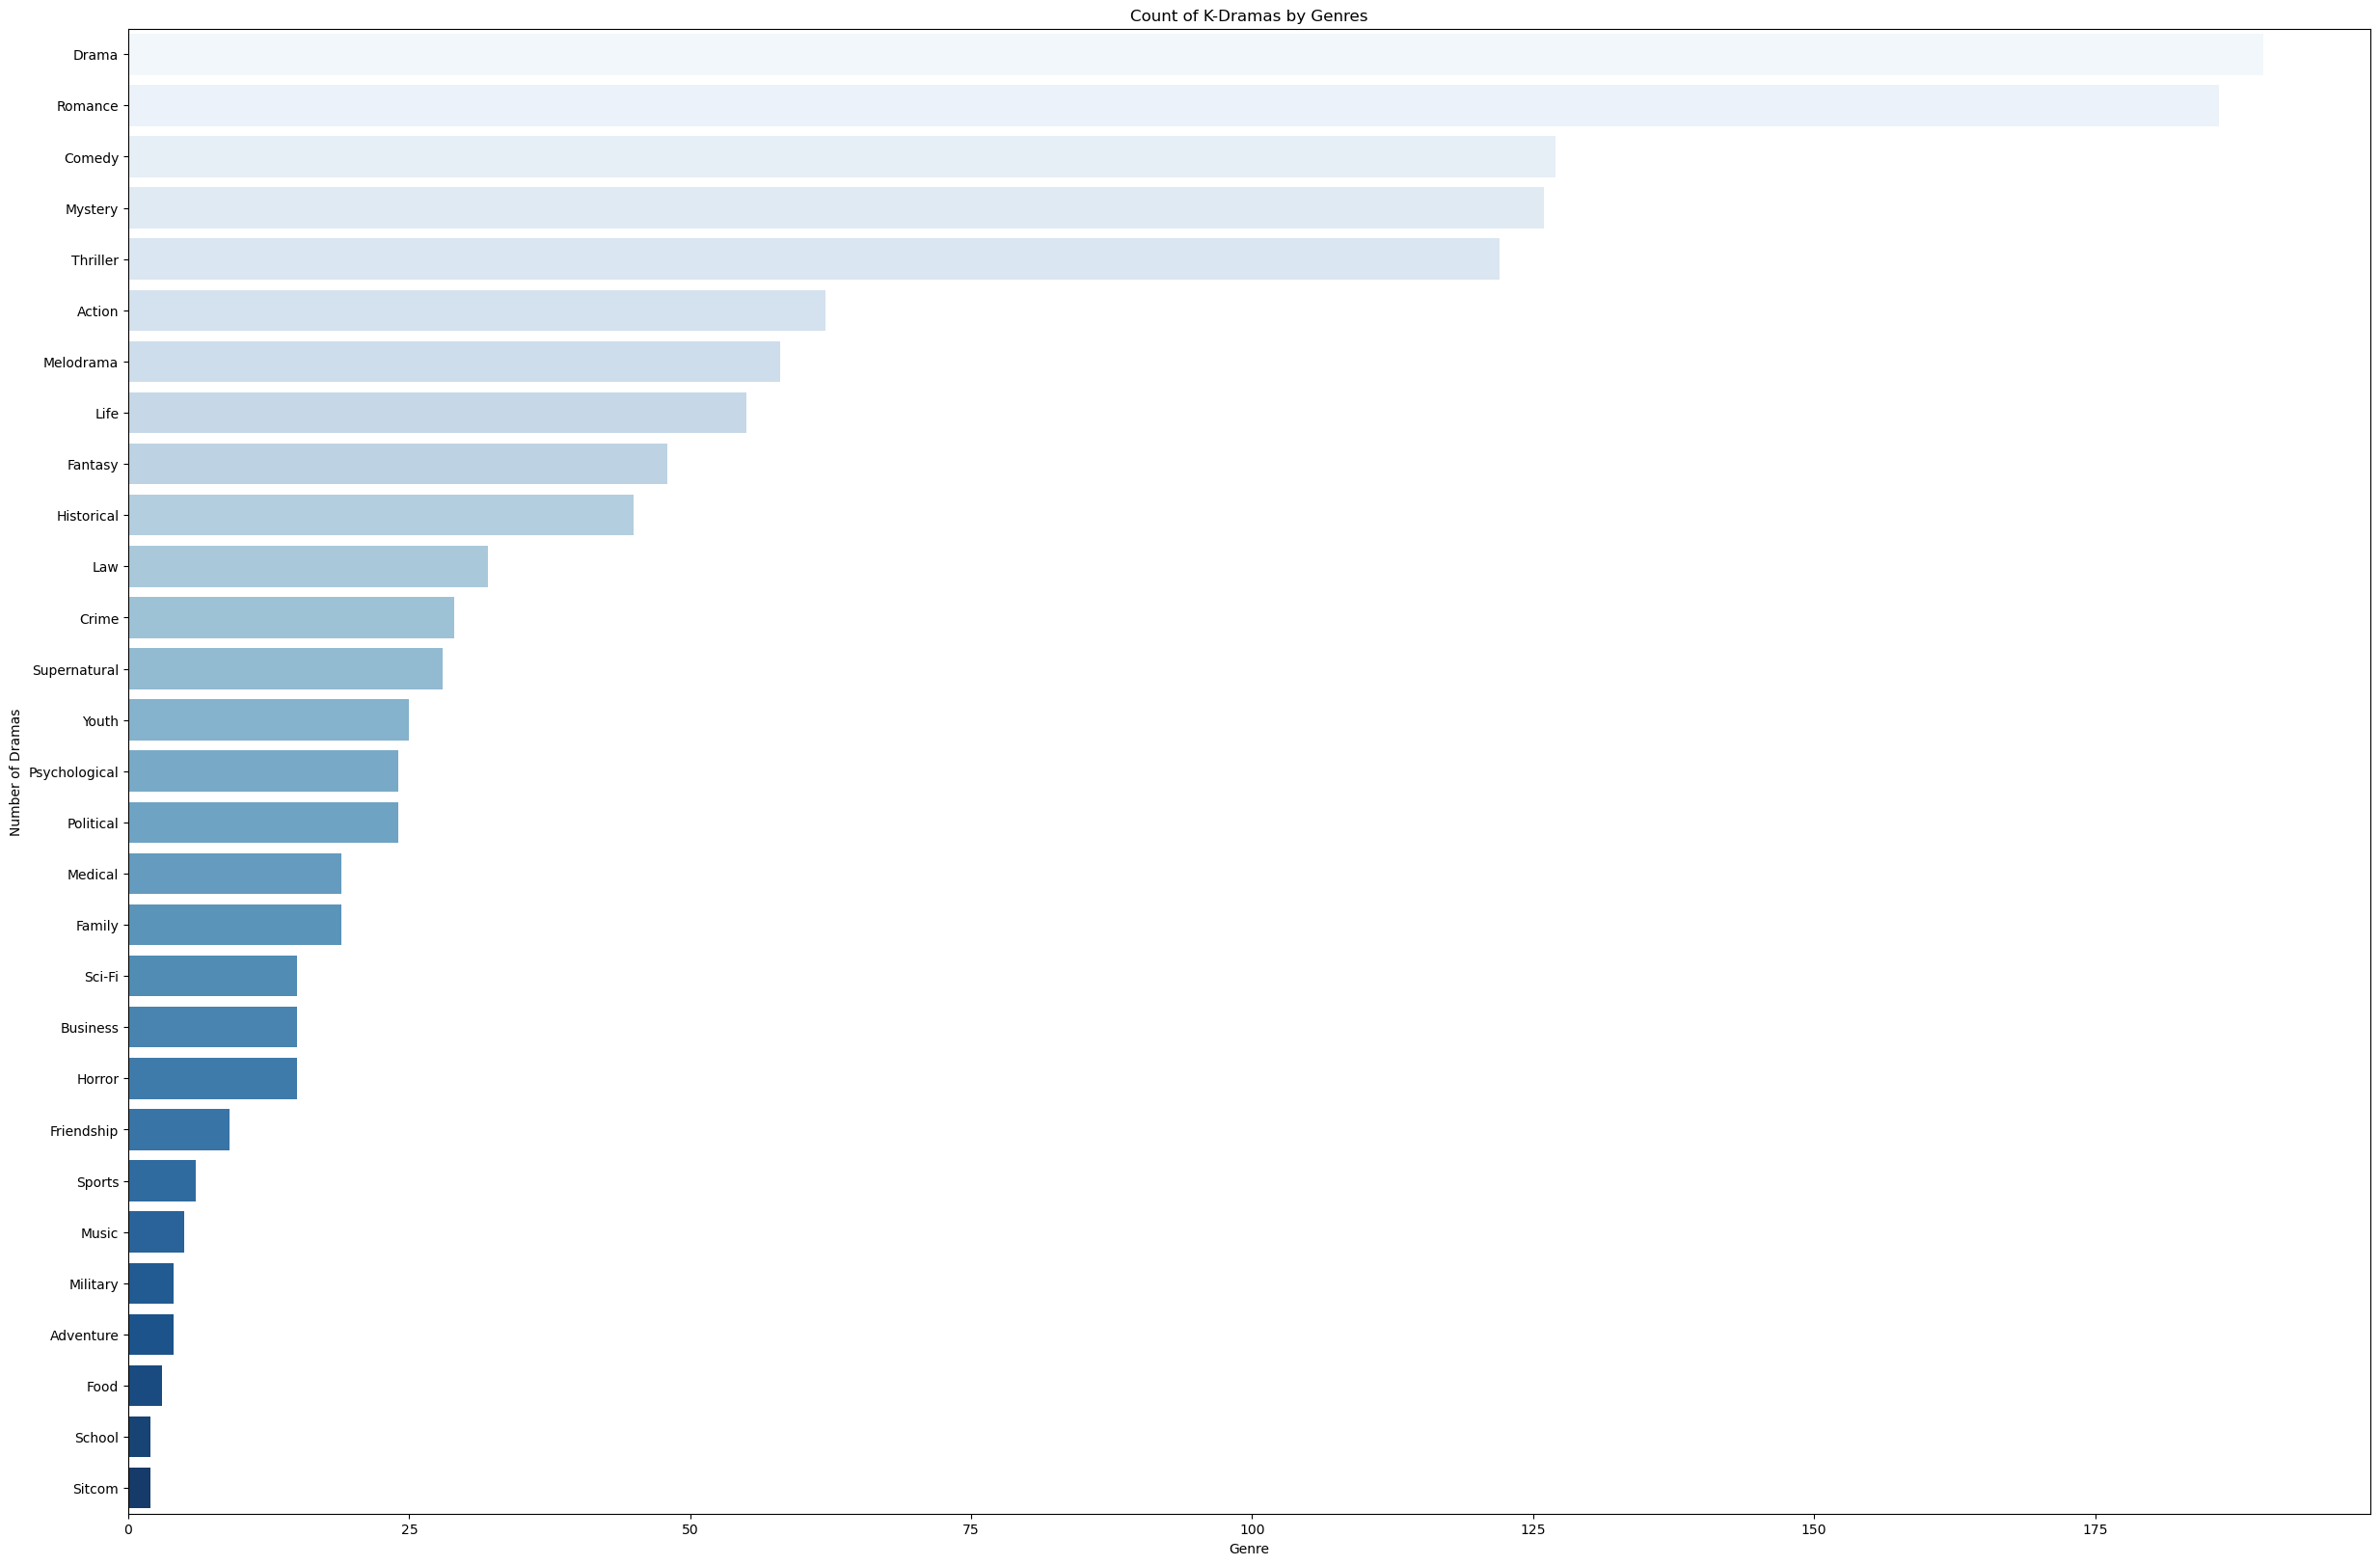

In [16]:
# Visualizing with plot 
plt.figure(figsize=(30,20))
plt.title('Count of K-Dramas by Genres')
sns.barplot(data=genre_df, x="Count", y="Genre", palette="Blues")
plt.xlabel("Genre")
plt.ylabel("Number of Dramas")
plt.show()

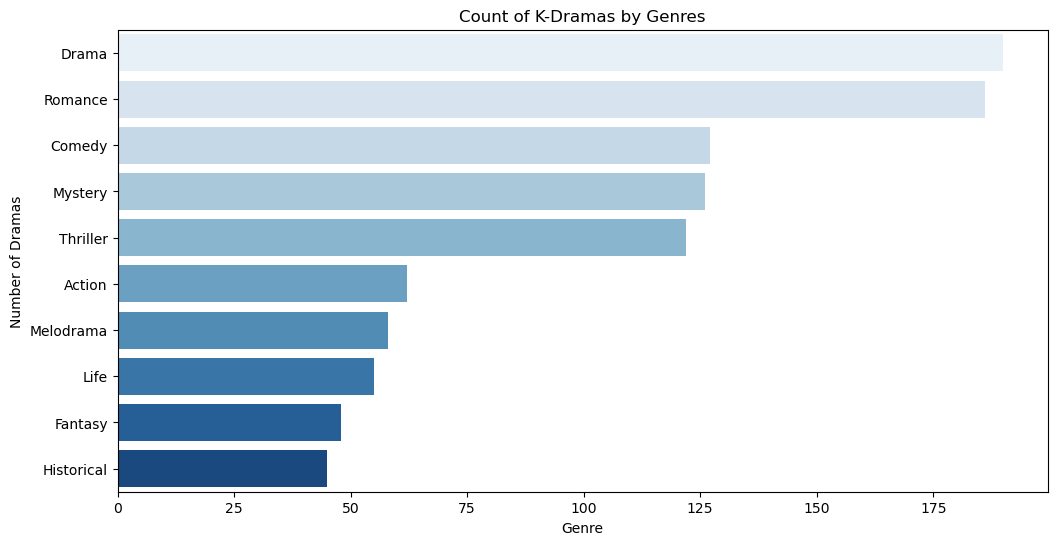

In [17]:
# Visualizing with plot top 10 most popular genres
genre_df_top10 = genre_df.head(10)
plt.figure(figsize=(12,6))
plt.title('Count of K-Dramas by Genres')
sns.barplot(data=genre_df_top10, x="Count", y="Genre", palette="Blues")
plt.xlabel("Genre")
plt.ylabel("Number of Dramas")
plt.show()

From this plot we know that K-Dramas were often produced drama and romance genre.

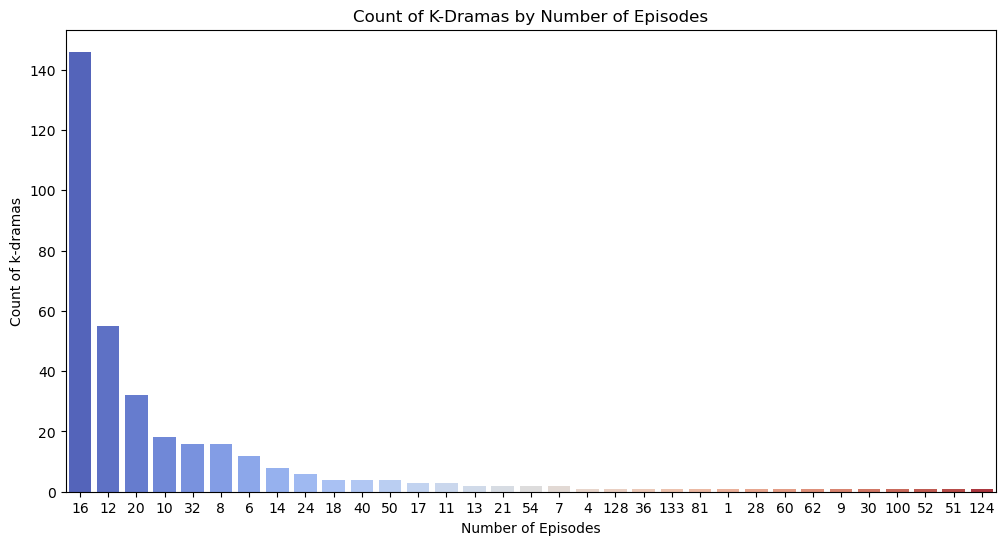

In [18]:
# Visualizing with plot the number of episodes in each drama
plt.figure(figsize=(12,6))
plt.title('Count of K-Dramas by Number of Episodes')
sns.countplot(data=data, x="Number of Episodes", order=data["Number of Episodes"].value_counts().index, palette="coolwarm")
plt.xlabel("Number of Episodes")
plt.ylabel("Count of k-dramas")
plt.show()


From this plot we know that 16 episodes is the general number of episodes in k-dramas. Almost all k-dramas was have 16 episodes.

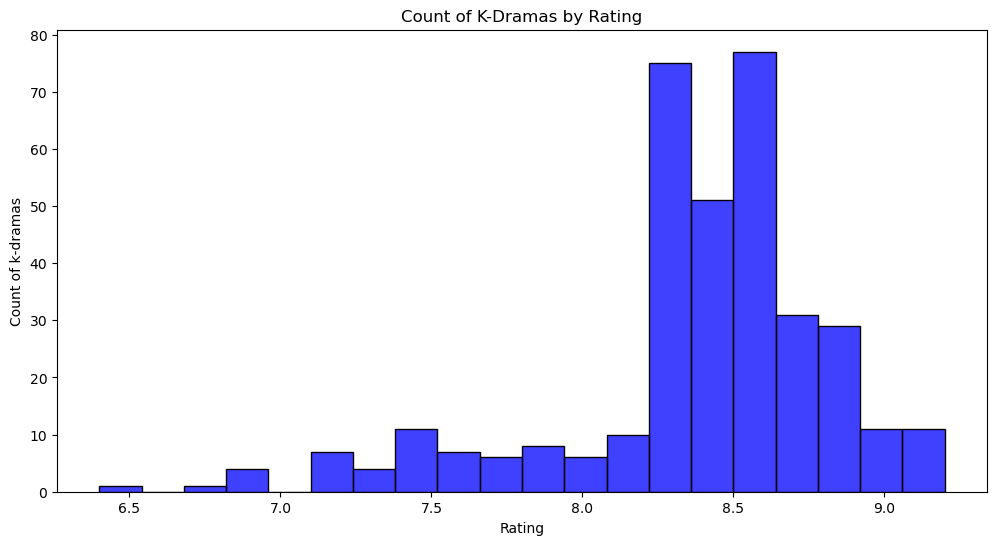

In [19]:
# Visualizing with plot the rating of each drama
plt.figure(figsize=(12,6))
plt.title('Count of K-Dramas by Rating')
sns.histplot(data=data, x=data["Rating"], bins=20, color="blue")    
plt.xlabel("Rating")
plt.ylabel("Count of k-dramas")
plt.show()

K-Dramas have a very high rating with most scoring between 8.0 until 9.0

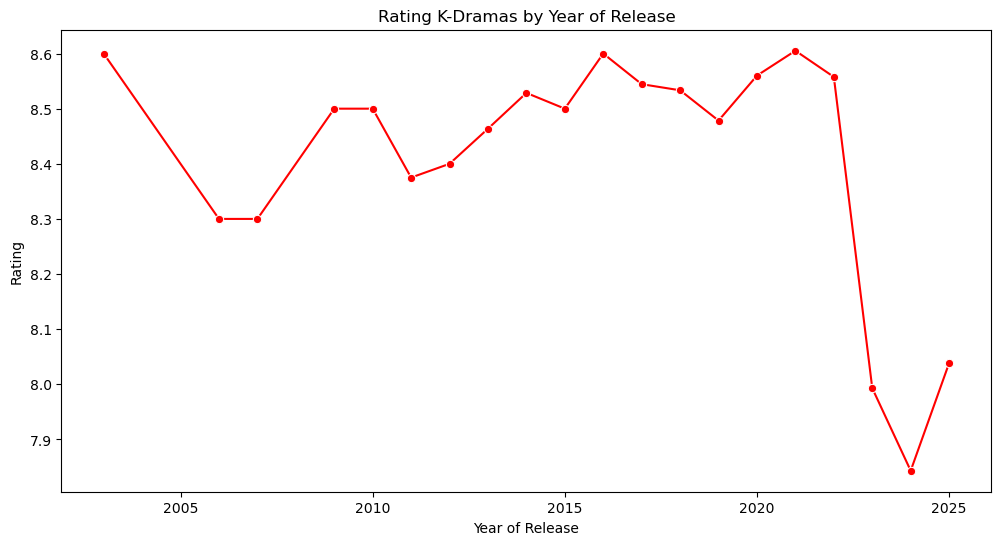

In [20]:
# relationship between rating and year of release
plt.figure(figsize=(12,6))
plt.title('Rating K-Dramas by Year of Release')
sns.lineplot(data=data, x=data["Year of release"], y=data["Rating"], color="red", ci=None, marker='o')
plt.xlabel("Year of Release")
plt.ylabel("Rating")
plt.show()

K-Dramas are very popular, however before 2025, their ratings were declining before increasing again in 2025.

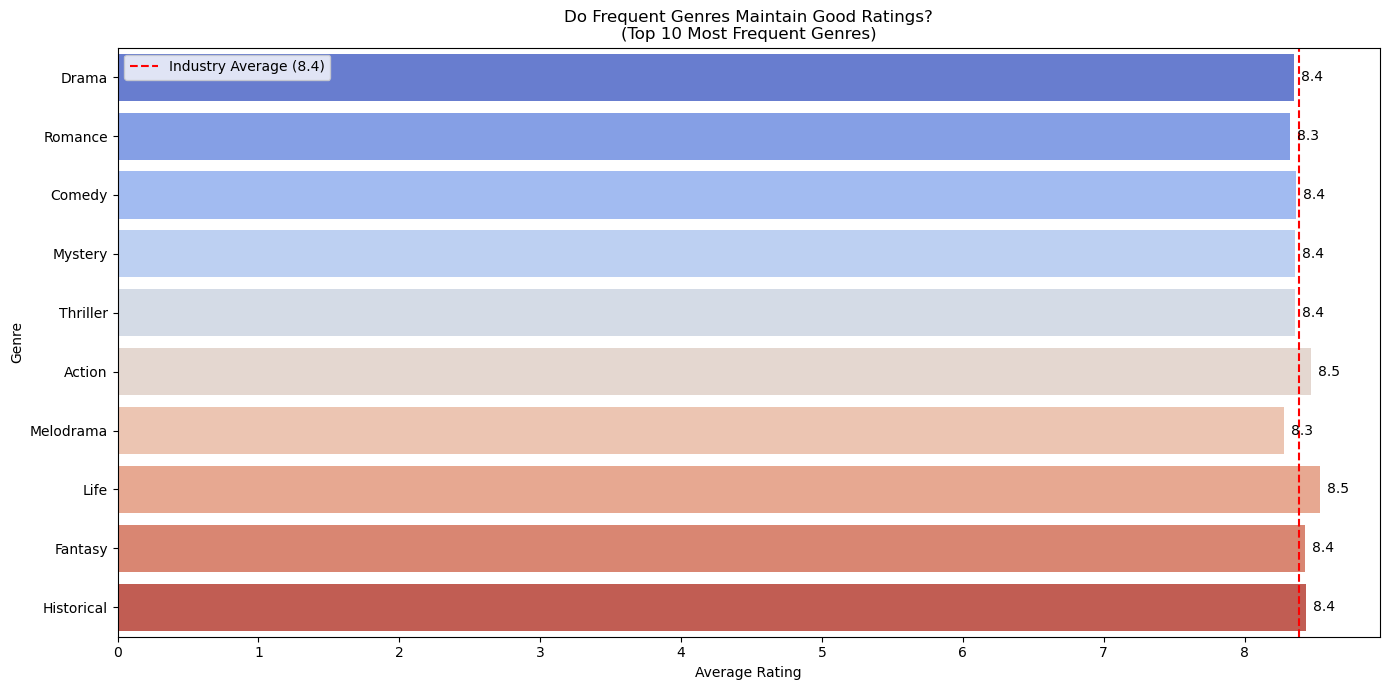

In [21]:
# # Check Relationship between rating and genre

# Step 1: Pecah Genre dan buat DataFrame baru
allGenres = data['Genre'].str.split(", ").explode().str.strip().str.title()

# Step 2: Buat dataframe baru yang menyimpan Genre dan Rating
genre_ratings = pd.DataFrame({
    'Genre': allGenres,
    'Rating': data.loc[allGenres.index, 'Rating'].values  # HARUS pakai .values supaya cocok
})

# Step 3: Ambil 10 Genre paling populer berdasarkan jumlah kemunculan
top_popular_genres = genre_ratings['Genre'].value_counts().head(10).index

# Step 4: Hitung statistik rata-rata rating dan jumlah data per genre
genre_stats = (
    genre_ratings[genre_ratings['Genre'].isin(top_popular_genres)]
    .groupby('Genre')['Rating']
    .agg(['mean', 'count'])
    .sort_values('count', ascending=False)
)

# Step 5: Visualisasi
plt.figure(figsize=(14, 7))

# Barplot untuk rata-rata rating
ax = sns.barplot(x='mean', y=genre_stats.index, data=genre_stats, palette="coolwarm", ci=None)

# Tambahkan teks angka rata-rata rating
for i, (mean, count) in enumerate(zip(genre_stats['mean'], genre_stats['count'])):
    ax.text(mean + 0.05, i, f"{mean:.1f}", va='center', ha='left', fontsize=10)

# Garis rata-rata semua rating
overall_avg = genre_ratings['Rating'].mean()
plt.axvline(x=overall_avg, color='red', linestyle='--', label=f'Industry Average ({overall_avg:.1f})')

# Judul dan label
plt.title('Do Frequent Genres Maintain Good Ratings?\n(Top 10 Most Frequent Genres)')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.legend()
plt.tight_layout()
plt.show()

A genre that has been popular has high ratings, but is still below average.

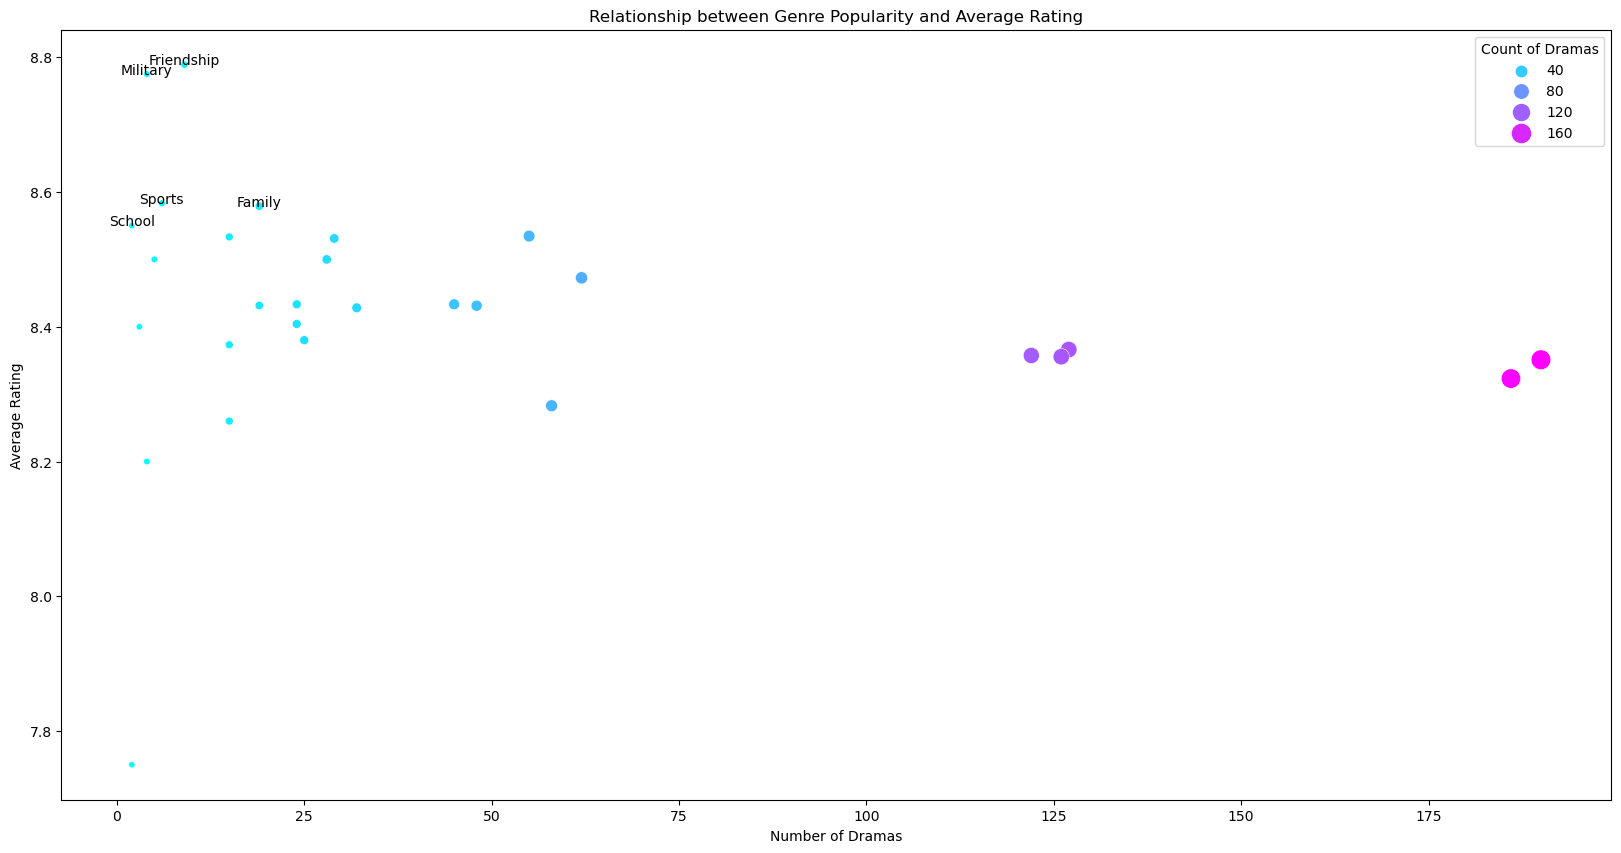

In [27]:
# Check how many k-dramas that produced from every genres
genre_stats = genre_ratings.groupby('Genre').agg(
    Count=('Rating', 'count'),
    Avg_Rating=('Rating', 'mean')
).reset_index()

# plotting the relationship between genre popularity and average rating
plt.figure(figsize=(20,10))
# sns.scatterplot(x='Count', y='Avg_Rating', data=genre_stats)
sns.scatterplot(x='Count', y='Avg_Rating', data=genre_stats, hue='Count', size='Count', palette='cool', sizes=(20, 200))
plt.legend(title='Count of Dramas')

plt.title('Relationship between Genre Popularity and Average Rating')
plt.xlabel('Number of Dramas')
plt.ylabel('Average Rating')

# Top 5 genres with highest average rating
for _, row in genre_stats.nlargest(5, 'Avg_Rating').iterrows():
    plt.text(row['Count'], row['Avg_Rating'], row['Genre'], ha='center')
plt.show()

To be a qualified drama, do not simply follow the popular genres.

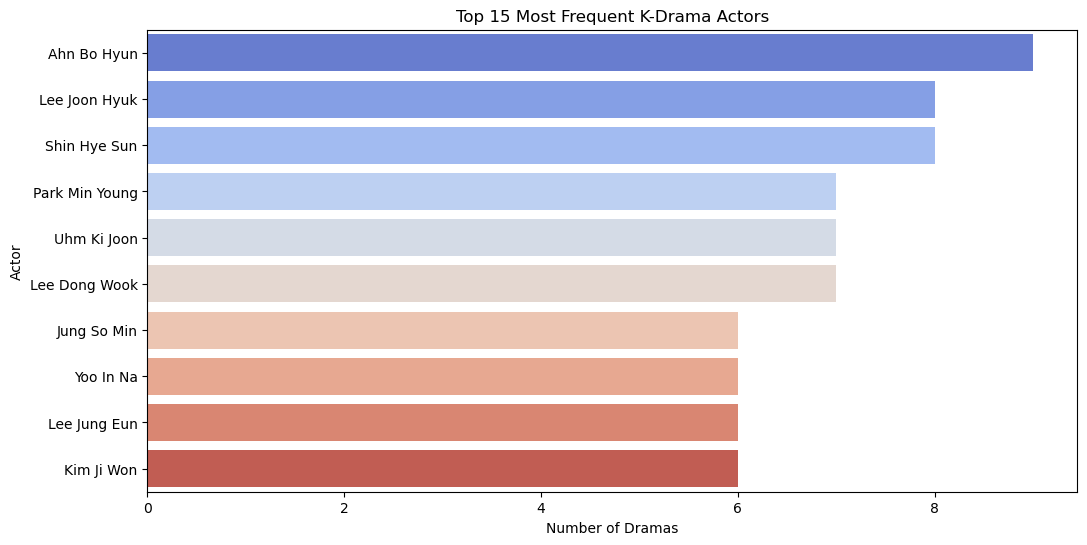

In [23]:
# Check Most Frequent K-Drama Actors
allActors = data["Actors"].str.split(", ").explode().str.strip()
actorCounts = Counter(allActors)

actor_df = pd.DataFrame(actorCounts.items(), columns=["Actor", "Count"]).sort_values(by="Count", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=actor_df, x="Count", y="Actor", palette="coolwarm")
plt.xlabel("Number of Dramas")
plt.ylabel("Actor")
plt.title("Top 15 Most Frequent K-Drama Actors")
plt.show()

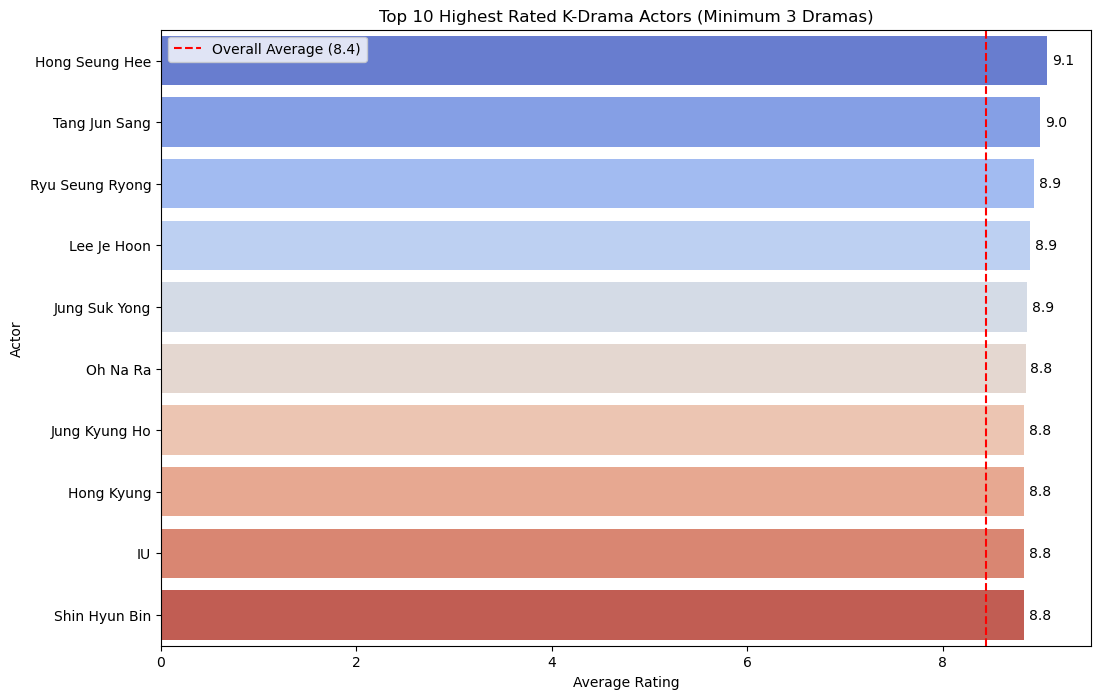

In [24]:
# check relationship between actor and rating
actor_ratings = pd.DataFrame({
    'Actor': allActors,
    'Rating': data.loc[allActors.index, 'Rating'].values
})

# Filter for actors with minimum 3 dramas for meaningful analysis
actor_counts = actor_ratings['Actor'].value_counts()
qualified_actors = actor_counts[actor_counts >= 3].index
actor_ratings = actor_ratings[actor_ratings['Actor'].isin(qualified_actors)]

# Calculate average ratings per actor (sorted)
actor_avg = actor_ratings.groupby('Actor')['Rating'].agg(['mean', 'count'])
actor_avg = actor_avg.sort_values('mean', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='mean', y=actor_avg.index, data=actor_avg, palette="coolwarm")

# Tambahkan teks angka rata-rata rating
for i, (mean, count) in enumerate(zip(actor_avg['mean'], actor_avg['count'])):
    ax.text(mean + 0.05, i, f"{mean:.1f}", va='center', ha='left', fontsize=10)
plt.axvline(x=actor_ratings['Rating'].mean(), color='red', linestyle='--', label=f'Overall Average ({actor_ratings["Rating"].mean():.1f})')
plt.legend()

plt.xlabel("Average Rating")
plt.ylabel("Actor")
plt.title("Top 10 Highest Rated K-Drama Actors (Minimum 3 Dramas)")
plt.show()

The number of dramas performed by an actor does not guarantee high ratings.

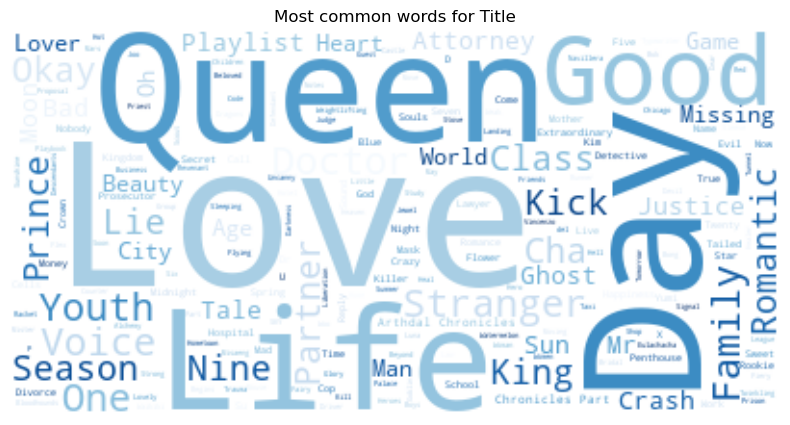

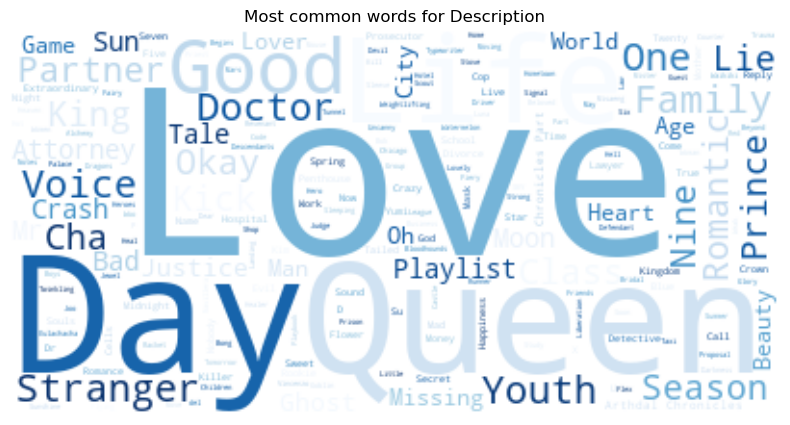

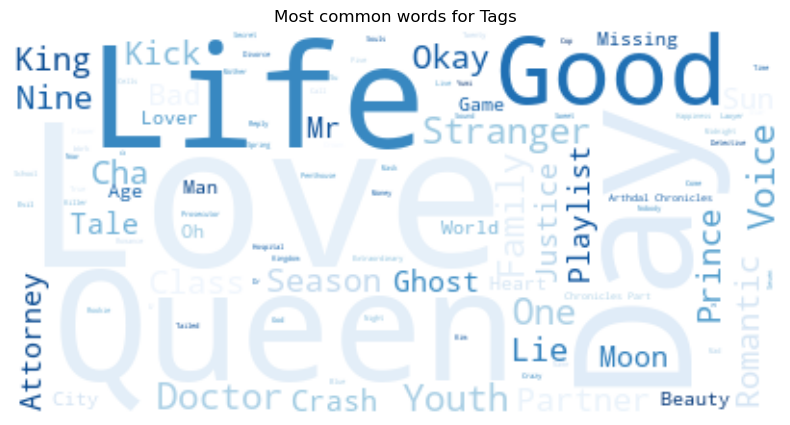

In [ ]:
# Check most frequent k-drama tags, title, and description
def generateWordClouds(column):
    words = " ".join(data['Title'])
    plt.figure(figsize=(10, 5))
    wordcloud_pos = WordCloud(background_color='white', colormap='Blues').generate(words)
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most common words for {column}')
    plt.show()

columns = ["Title", "Description", "Tags"]

for i in columns:
    generateWordClouds(i)